In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset = pd.read_csv(r"C:\Users\vphan\OneDrive\Desktop\edunet\Week1\Week2\sustainable_agriculture\Sustainable-Agriculture-Edunet-Internship\Crop and fertilizer dataset.csv")

dataset.head(5)

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,Link
0,Kolhapur,Black,75,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
1,Kolhapur,Black,80,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
2,Kolhapur,Black,85,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
3,Kolhapur,Black,90,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
4,Kolhapur,Black,95,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4513 entries, 0 to 4512
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District_Name  4513 non-null   object 
 1   Soil_color     4513 non-null   object 
 2   Nitrogen       4513 non-null   int64  
 3   Phosphorus     4513 non-null   int64  
 4   Potassium      4513 non-null   int64  
 5   pH             4513 non-null   float64
 6   Rainfall       4513 non-null   int64  
 7   Temperature    4513 non-null   int64  
 8   Crop           4513 non-null   object 
 9   Fertilizer     4513 non-null   object 
 10  Link           4513 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 388.0+ KB


In [16]:
dataset.shape

(4513, 11)

In [17]:
dataset.describe()

,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature
count,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000
mean,95.409927,54.341901,63.595170,6.715267,819.189010,25.915134
std,38.060648,16.551991,35.691911,0.625198,251.730813,5.897328
min,20.000000,10.000000,5.000000,5.500000,300.000000,10.000000
25%,60.000000,40.000000,40.000000,6.000000,600.000000,20.000000
50%,105.000000,55.000000,55.000000,6.500000,800.000000,25.000000
75%,125.000000,65.000000,75.000000,7.000000,1000.000000,30.000000
max,150.000000,90.000000,150.000000,8.500000,1700.000000,40.000000


In [18]:
dataset.isna().sum()

District_Name    0
Soil_color       0
Nitrogen         0
Phosphorus       0
Potassium        0
pH               0
Rainfall         0
Temperature      0
Crop             0
Fertilizer       0
Link             0
dtype: int64

In [19]:
dataset.duplicated().sum()

0

In [20]:
dataset['Crop'].unique()

array(['Sugarcane', 'Jowar', 'Cotton', 'Rice', 'Wheat', 'Groundnut',
       'Maize', 'Tur', 'Urad', 'Moong', 'Gram', 'Masoor', 'Soybean',
       'Ginger', 'Turmeric', 'Grapes'], dtype=object)

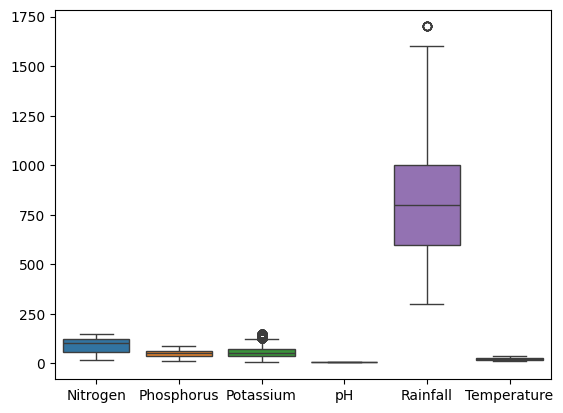

In [21]:
sns.boxplot(dataset)
plt.show()

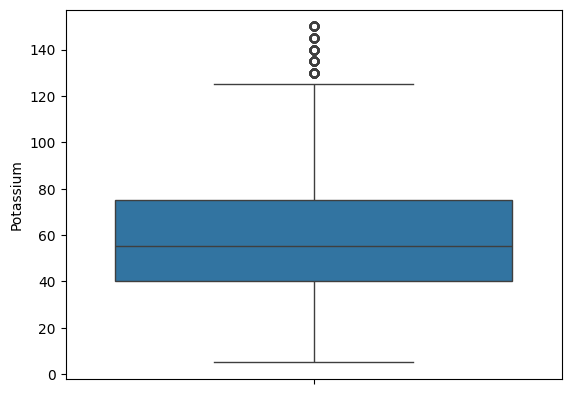

In [22]:
sns.boxplot(dataset['Potassium'])
plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder
x = dataset.iloc[:, :-2]
y = dataset.iloc[:, -2]

In [24]:
x.head(5)

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop
0,Kolhapur,Black,75,50,100,6.5,1000,20,Sugarcane
1,Kolhapur,Black,80,50,100,6.5,1000,20,Sugarcane
2,Kolhapur,Black,85,50,100,6.5,1000,20,Sugarcane
3,Kolhapur,Black,90,50,100,6.5,1000,20,Sugarcane
4,Kolhapur,Black,95,50,100,6.5,1000,20,Sugarcane


In [25]:
y.head()

0    Urea
1    Urea
2    Urea
3    Urea
4    Urea
Name: Fertilizer, dtype: object

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [27]:
x['Soil_color'] = pd.DataFrame(le.fit_transform(x['Soil_color']))
x['Crop'] = pd.DataFrame(le.fit_transform(x['Crop']))
x['District_Name'] = pd.DataFrame(le.fit_transform(x['District_Name']))

In [28]:
x.head()

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop
0,0,0,75,50,100,6.5,1000,20,11
1,0,0,80,50,100,6.5,1000,20,11
2,0,0,85,50,100,6.5,1000,20,11
3,0,0,90,50,100,6.5,1000,20,11
4,0,0,95,50,100,6.5,1000,20,11


In [29]:
y = pd.Series(le.fit_transform(y))
y.head()

0    17
1    17
2    17
3    17
4    17
dtype: int32

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8, random_state=42
)


In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=20)

In [31]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20)

In [32]:
print(dt.score(x_train, y_train) * 100)
print(dt.score(x_test, y_test) * 100)

99.91689750692521
96.89922480620154


In [33]:
y_pred = dt.predict(x_test)


In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9689922480620154
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        29
           2       0.92      1.00      0.96        24
           3       1.00      1.00      1.00        18
           5       0.96      0.98      0.97        90
           6       1.00      1.00      1.00         2
           7       0.92      1.00      0.96        23
           8       1.00      1.00      1.00        10
           9       0.86      0.86      0.86        22
          10       0.99      0.99      0.99       134
          11       1.00      0.69      0.82        13
          12       1.00      1.00      1.00         4
          13       0.98      0.98      0.98       122
          14       1.00      1.00      1.00        43
          15       0.95      0.93      0.94        80
          16       1.00      1.00      1.00         2
          17       0.97      0.97      0.97       27

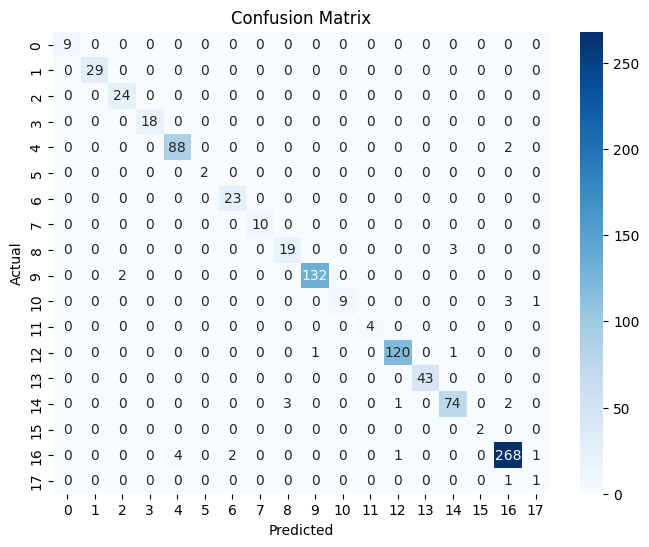

In [37]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [38]:
import joblib
joblib.dump(dt, "Fertilizer_Recommendation_Model.pkl")


['Fertilizer_Recommendation_Model.pkl']